![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)
# AIA作業一 : House Prices: Advanced Regression Techniques
- 日期: 2019/2/22
- 技巧:
    1. 缺失值觀察及處理
    2. 偏態觀察及處理
    3. 正規化處理及標籤編碼
    4. EDA
- 模型:
    1. [XGBRegressor](https://xgboost.readthedocs.io/en/latest/)
    2. [StackingCVRegressor](http://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/#stackingcvregressor)
- 參數最佳化: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- 參考範例:
    - [Kaggle – House Price](https://chtseng.wordpress.com/2017/12/26/kaggle-house-price/), 作者: **CH.Tseng**
    - [XGboost数据比赛实战之调参篇(完整流程)](https://segmentfault.com/a/1190000014040317), 作者: **有故事**

# 載入套件

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# 1. 載入資料
>一併處理特徵工程，將dataset: **test** 附加於 **train** 後方，成為另一個dataset: **x_train**。

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
x_train = pd.concat([train, test], sort = False).reset_index(drop = True)

# 2. 資料探勘
>`pd.set_option('display.max_columns',None)`: 展開所有欄位

In [3]:
pd.set_option('display.max_columns',None)
x_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,

In [4]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

>描述DataFrame的所有列，不管字串型欄位(Categorical)或數值型欄位(Numerical)

In [5]:
x_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919,2919,2918,2918,2895,2896.000000,2919,2919,2919,2838,2837,2837,2840,2918.000000,2839,2918.000000,2918.000000,2918.000000,2919,2919,2919,2918,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918,2919.000000,2917,2919.000000,1499,2762,2760.000000,2760,2918.000000,2918.000000,2760,2760,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,10,571,105,2919.000000,2919.000000,2919.000000,2918,2919,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2265,NaN,NaN,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,NaN,NaN,NaN,NaN,2310,2876,1025,1014,1742,NaN,1798,2538,1308,1283,2606,1904,851,NaN,2493,NaN,NaN,NaN,2874,1493,2723,2671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1492,NaN,2717,NaN,744,1723,NaN,1230,NaN,NaN,2604,2654,2641,NaN,NaN,NaN,NaN,NaN,NaN,4,329,95,NaN,NaN,NaN,2525,2402,NaN
mean,1460.000000,57.137718,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.089072,5.564577,1971.312778,1984.264474,NaN,NaN,NaN,NaN,NaN,102.201312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441.423235,NaN,49.582248,560.772104,1051.777587,NaN,NaN,NaN,NaN,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,NaN,6.451524,NaN,0.597122,NaN,NaN,1978.113406,NaN,1.766621,472.874572,NaN,NaN,NaN,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,NaN,NaN,NaN,50.825968,6.213087,2007.792737,NaN,NaN,180921.195890
std,842.787043,42.517628,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.409947,1.113131,30.291442,20.894344,NaN,NaN,NaN,NaN,NaN,179.334253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.610826,NaN,169.205611,439.543659,440.766258,NaN,NaN,NaN,NaN,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,NaN,1.569379,NaN,0.646129,NaN,NaN,25.574285,NaN,0.761624,215.394815,NaN,NaN,NaN,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,NaN,NaN,NaN,567.402211,2.714762,1.314964,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,

# 3. 資料缺失值觀察
>計算欄位缺失值總數

In [6]:
x_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive

>計算缺失值百分比: $\frac{缺失值筆數}{資料總筆數}\times 100\%$

In [7]:
data_na = (x_train.isnull().sum() / len(x_train)) * 100
data_na = data_na.drop(data_na[data_na==0].index).sort_values(ascending=False)
missing_data=pd.concat([data_na], axis=1, keys=['Percent of NA'])
missing_data.drop(index='SalePrice', inplace=True)
missing_data

,Percent of NA
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


>初步丟棄不重要的欄位
1. 丟棄缺失值>90%之欄位 (**Alley**,**MiscFeature**,**PoolQC**)
2. 丟棄與價格不重要的欄位
  

In [8]:
x_train.drop(columns=["Id","Street","Alley","Utilities","PavedDrive","PoolQC","MiscFeature"], inplace=True)

>尋找缺失值百分比相近的，代表有高度關聯性
1. 印出有關聯性的缺失值位置
2. 取交集，可一併處理
3. 找出非交集的特定位置，優先處理

In [9]:
dic={}
columname = [['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'],
             ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

for i in range(0,len(columname)):
    for col in columname[i]:
        num = x_train[col].isna().sum()
        loc = x_train[col][x_train[col].isnull().values==True].index.tolist()
        print('列名："{}", 有"{}"個缺失值'.format(col,num))
        print('缺失值位置:"{}"'.format(loc))

    for j in range(0,len(columname[i])):
        listname = 'list' + str(j)
        setname = 's'+ str(j)
        dic.setdefault(listname,[])
        dic.setdefault(setname,[])
        dic[listname] = x_train[columname[i][j]][x_train[columname[i][j]].isnull().values==True].index.tolist()
        dic[setname] = set(dic[listname])

    s = dic['s0'] & dic['s1'] & dic['s2'] & dic['s3'] & dic['s4']
    print('交集:')
    print(sorted(list(s)))

    for j in range(0,len(columname[i])):
        rmname = 'r' + str(j)
        setname = 's'+ str(j)
        dic.setdefault(rmname,[])
        dic[rmname] = list(dic[setname].difference(s))
        print('列名："{}", 剩餘缺失值位置："{}"'.format(columname[i][j],dic[rmname]))
    print('=======================================================')    

列名："BsmtQual", 有"81"個缺失值
缺失值位置:"[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412, 1585, 1593, 1729, 1778, 1814, 1847, 1848, 1856, 1857, 1858, 1860, 1915, 2050, 2066, 2068, 2120, 2122, 2188, 2189, 2190, 2193, 2216, 2217, 2218, 2224, 2387, 2435, 2452, 2453, 2490, 2498, 2547, 2552, 2564, 2578, 2599, 2702, 2763, 2766, 2803, 2804, 2824, 2891, 2904]"
列名："BsmtCond", 有"82"個缺失值
缺失值位置:"[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412, 1585, 1593, 1729, 1778, 1814, 1847, 1848, 1856, 1857, 1858, 1860, 1915, 2040, 2050, 2066, 2068, 2120, 2122, 2185, 2188, 2189, 2190, 2193, 2216, 2224, 2387, 2435, 2452, 2453, 2490, 2498, 2524, 2547, 2552, 2564, 2578, 2599, 2702, 2763, 2766, 2803, 2804, 2824, 2891, 2904]"
列名："Bsmt

# 4. 填補缺失值
- 數值轉字串型態
    1. **MSSubClass**
    2. **YrSold**
- 數值型欄位補**平均數**    
- 關聯性缺失欄位
    1. **非交集**的特定缺失值優先處理
    2. 一併補**眾數或中位數**
- **FireplaceQu**, **Fence**的缺失值
    * Nan可能代表家裡無此項目，故用**"None"**取代

In [10]:
# 轉型態
x_train.MSSubClass = x_train.MSSubClass.astype('str')
x_train.YrSold = x_train.YrSold.astype('str')
# 缺失值
x_train.MSZoning.fillna(*x_train.MSZoning.mode(), inplace=True) #補眾數
x_train.LotFrontage.fillna(x_train.LotFrontage.mean(), inplace=True) #補平均值
x_train.Exterior1st.fillna(*x_train.Exterior1st.mode(), inplace=True) #補眾數
x_train.Exterior2nd.fillna(*x_train.Exterior2nd.mode(), inplace=True) #補眾數

# 'MasVnrType','MasVnrArea' 有關連性需特別處理
x_train.loc[2610,'MasVnrType'] = 'BrkFace' #個案優先填入
x_train.MasVnrType.fillna(*x_train.MasVnrType.mode(), inplace=True) #補眾數
x_train.MasVnrArea.fillna(*x_train.MasVnrArea.mode(), inplace=True) #補眾數

# 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' 有關連性
# 個案優先填入
x_train.loc[2217,'BsmtQual'] = 'TA'
x_train.loc[2218,'BsmtQual'] = 'TA'
x_train.loc[2040,'BsmtCond'] = 'TA'
x_train.loc[2185,'BsmtCond'] = 'TA'
x_train.loc[2524,'BsmtCond'] = 'TA'
x_train.loc[948,'BsmtExposure'] = 'No'
x_train.loc[2348,'BsmtExposure'] = 'No'
x_train.loc[1487,'BsmtExposure'] = 'No'
x_train.loc[332,'BsmtFinType2'] = 'Unf'
x_train.BsmtQual.fillna(*x_train.BsmtQual.mode(), inplace=True) #補眾數
x_train.BsmtCond.fillna(*x_train.BsmtCond.mode(), inplace=True) #補眾數
x_train.BsmtExposure.fillna(*x_train.BsmtExposure.mode(), inplace=True) #補眾數
x_train.BsmtFinType1.fillna(*x_train.BsmtFinType1.mode(), inplace=True) #補眾數
x_train.BsmtFinType2.fillna(*x_train.BsmtFinType2.mode(), inplace=True) #補眾數

x_train.BsmtFinSF1.fillna(*x_train.BsmtFinSF1.mode(), inplace=True) #補眾數
x_train.BsmtFinSF2.fillna(*x_train.BsmtFinSF2.mode(), inplace=True) #補眾數
x_train.BsmtUnfSF.fillna(*x_train.BsmtUnfSF.mode(), inplace=True) #補眾數
x_train.TotalBsmtSF.fillna(*x_train.TotalBsmtSF.mode(), inplace=True) #補眾數
x_train.Electrical.fillna(*x_train.Electrical.mode(), inplace=True) #補眾數
x_train.BsmtFullBath.fillna(*x_train.BsmtFullBath.mode(), inplace=True) #補眾數
x_train.BsmtHalfBath.fillna(*x_train.BsmtHalfBath.mode(), inplace=True) #補眾數
x_train.KitchenQual.fillna(*x_train.KitchenQual.mode(), inplace=True) #補眾數
x_train.Functional.fillna(*x_train.Functional.mode(), inplace=True) #補眾數
x_train.FireplaceQu.fillna('None', inplace=True) #用 None取代

# 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond'  有關連性
#個案優先填入
x_train.loc[2576,'GarageYrBlt'] = x_train.GarageYrBlt.median() 
x_train.loc[2126,'GarageYrBlt'] = x_train.GarageYrBlt.median() 
x_train.loc[2576,'GarageFinish'] = str(*x_train.GarageFinish.mode())
x_train.loc[2126,'GarageFinish'] = str(*x_train.GarageFinish.mode())
x_train.loc[2576,'GarageQual'] = str(*x_train.GarageQual.mode())
x_train.loc[2126,'GarageQual'] = str(*x_train.GarageQual.mode())
x_train.loc[2576,'GarageCond'] = str(*x_train.GarageCond.mode())
x_train.loc[2126,'GarageCond'] = str(*x_train.GarageCond.mode())
x_train.GarageCars.fillna(x_train.GarageCars.median(), inplace=True) #補中位數
x_train.GarageArea.fillna(x_train.GarageArea.median(), inplace=True) #補中位數
x_train.GarageType.fillna(*x_train.GarageType.mode(), inplace=True) #補眾數
x_train.GarageYrBlt.fillna(*x_train.GarageYrBlt.mode(), inplace=True) #補眾數
x_train.GarageFinish.fillna(*x_train.GarageFinish.mode(), inplace=True) #補眾數
x_train.GarageQual.fillna(*x_train.GarageQual.mode(), inplace=True) #補眾數
x_train.GarageCond.fillna(*x_train.GarageCond.mode(), inplace=True) #補眾數

x_train.Fence.fillna('None', inplace=True) #用 None取代
x_train.SaleType.fillna(*x_train.SaleType.mode(), inplace=True) #補眾數

In [11]:
x_train.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
                 ... 
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageYrBlt         0
GarageFinish        0
GarageCars          0
GarageArea

# 5. 偏態處理與觀察
>我們先看看所有特徵中偏態係數的情形
  - 偏態係數沒有一個絕對範圍，大於*0.5*時我們就可以稱分佈過於右偏，反之，小於*-0.5*就是左偏。
  - 我們針對偏態係數大於*0.75*的欄位以及SalePrice進行對數轉換。 (或是使用Box Cox也可以)

The skewness of SalePrice is 1.8828757597682129


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


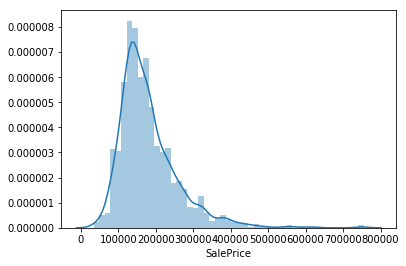

In [12]:
# 查看偏移情況
print ("The skewness of SalePrice is {}".format(x_train['SalePrice'].skew()))
sns.distplot(x_train.SalePrice[:1460])

In [13]:
from scipy.stats import norm, skew

numeric_feats = x_train.dtypes[x_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = x_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [14]:
skewness.index

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'SalePrice', 'WoodDeckSF',
       'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF',
       'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath',
       'BsmtFullBath', 'OverallCond', 'BedroomAbvGr', 'GarageArea',
       'OverallQual', 'MoSold', 'FullBath', 'GarageCars', 'YearRemodAdd',
       'GarageYrBlt', 'YearBuilt'],
      dtype='object')

In [15]:
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

# 6. 偏態與對數轉換
對數轉換的目的是為了減少數值差距過大及離群值而帶來的影響，從絕對差異轉變為相對差異，特徵的離散程度穩定。

  - 社會統計數據例如家庭平均年收,國民人均所得等等，通常都是屬於右偏分佈的資料，因為有錢人屬於少數，肯定會把整體的平均拉高，而且動輒幾億的身價會將x軸拉得非常非常的長，取對數之後，就會變成級距的相對差異，例如將 $10^9$取$log10$就是$9$，差距瞬間就減少，但是要注意的是，取對數後的資料單位就不具意義了。
  

  - 下圖是GrLiveArea與SalePrice散佈圖與密度圖，從左圖看來兩者有呈現一點指數遞增的關係，相關係數為0.73，兩者的資料分佈皆呈現右偏分佈，而迴歸模型的基本假設是資料為線性關係，顯然這種分佈不適合迴歸模型，所以這裏就需要用到對數轉換，右圖是經過對數轉換的結果，我們發現經過對數轉換後，相關係數有提升，而且從非線性轉為線性。

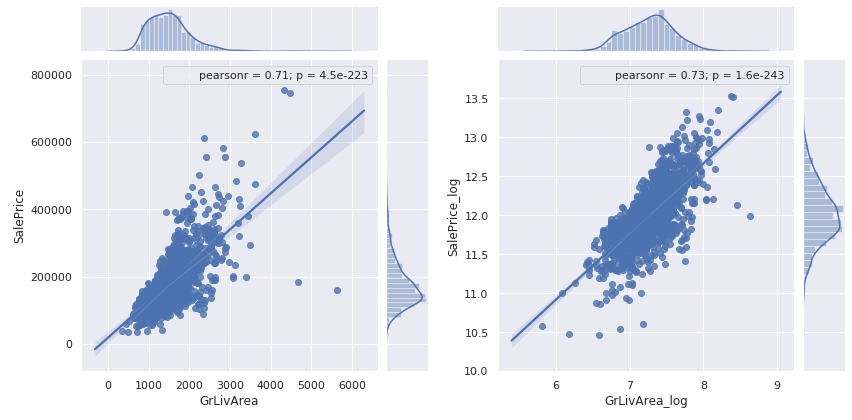

In [16]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sfg = SeabornFig2Grid

example =  x_train.copy() #副本一份當EDA使用
example['SalePrice_log'] = np.log1p(example['SalePrice'])
example['GrLivArea_log'] = np.log1p(example['GrLivArea'])

sns.set()

pp = sns.jointplot(x='GrLivArea',y='SalePrice',data=example,kind='reg').annotate(stats.pearsonr)
pp2 = sns.jointplot(x='GrLivArea_log',y='SalePrice_log',data=example,kind='reg').annotate(stats.pearsonr)

fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1,2)

sfg(pp, fig, gs[0])
sfg(pp2, fig, gs[1])
plt.tight_layout()
plt.show()


>使用`np.log1p()`來正規化連續性數值

Skewness is 0.12134661989685333


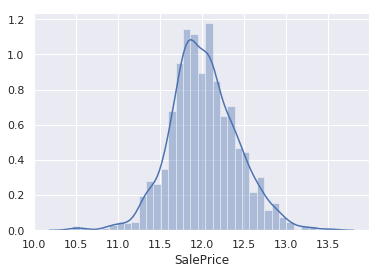

In [17]:
train['SalePrice'] = np.log1p(x_train.SalePrice[:1460])
print ('Skewness is', train['SalePrice'].skew())
sns.distplot(train.SalePrice)

>瞭解一下dataset中有多少為Numerical及Categorical類型的欄位

In [18]:
# 所有 categorical 欄位名稱
categorical = [var for var in x_train.columns if x_train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

# 所有 numerical 欄位名稱
numerical = [var for var in x_train.columns if x_train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 39 categorical variables
There are 35 numerical variables


>Numerical類型的資料，還可再區分為連續與離散兩種變數，這是由資料是否呈現連續變化來作判斷的。
    >- 離散變數：
        1. 其數值只能用自然數或整數單位計算。
        2. 或稱為計量單位數，因為都是由計數方法取得。
        3. 例如：企業個數、職工人數、設備台數等。
    >- 連續變數：        
        1. 在一定區間內可以任意取值。
        2. 其數值是連續不斷的，相鄰兩個數值可作無限分割。
        3. 例如：生產零件的規格尺寸、人體測量的身高、體重、胸圍等。

>以數值種類的數目作為評斷標準，若少於20個，則為離散變數，反之則為連續變數。       

In [19]:
threshold = 20
discrete = []

for var in numerical:
    if len(x_train[var].unique()) < threshold:
        discrete.append(var)

print('There are {} discrete variables'.format(len(discrete)))
#print(discrete)
continuous = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice']]
#print(continuous)
print('There are {} continuous variables'.format(len(continuous)))

There are 13 discrete variables
There are 21 continuous variables


# 7. 連續型變數正規化
- 先做**log**處理偏態，再做**min-max**正規化

In [20]:
# 正規化其它的連續性資料欄位
def Normalized():
    global x_train
    for col in continuous:
        # min-max
        Min, Max = np.log1p(x_train[col]).min(), np.log1p(x_train[col]).max()
        x_train[col] = (np.log1p(x_train[col]) - Min)/(Max - Min)
Normalized()        

# 8. 字串型欄位做標籤編碼(LabelEncoder)

In [21]:
from sklearn.preprocessing import LabelEncoder

# process columns, apply LabelEncoder to categorical features
for col in categorical:
    lbl = LabelEncoder()
    lbl.fit(list(x_train[col].values)) 
    x_train[col] = lbl.transform(list(x_train[col].values))

In [22]:
x_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,10,3,0.413268,0.366271,3,3,4,0,5,2,2,0,5,7,5,0.950951,0.884882,1,1,12,13,1,0.716038,2,4,2,2,3,3,2,0.759508,5,0.000000,0.646838,0.774668,1,0,1,4,0.345070,0.884420,0.0,0.577436,1.0,0.0,2,1,3,1,2,8,6,0,3,1,0.363650,1,2.0,0.863430,4,4,0.000000,0.624312,0.000000,0.000000,0.0,0,4,0.000000,2,2,8,4,208500.0
1,5,3,0.490307,0.391245,3,3,2,0,24,1,2,0,2,6,8,0.760143,0.437057,1,1,8,8,2,0.000000,3,4,1,2,3,1,0,0.797188,5,0.000000,0.728731,0.819153,1,0,1,4,0.487537,0.000000,0.0,0.469935,0.0,1.0,2,0,3,1,3,6,6,1,5,1,0.274609,1,2.0,0.839518,4,4,0.784977,0.000000,0.000000,0.000000,0.0,0,4,0.000000,5,1,8,4,181500.0
2,10,3,0.429990,0.422289,0,3,4,0,5,2,2,0,5,7,5,0.936906,0.868404,1,1,12,13,1,0.690361,2,4,2,2,3,2,2,0.716357,5,0.000000,0.783246,0.782930,1,0,1,4,0.371528,0.886245,0.0,0.592825,1.0,0.0,2,1,3,1,2,6,6,1,5,1,0.357096,1,2.0,0.877627,4,4,0.000000,0.568957,0.000000,0.000000,0.0,0,4,0.000000,9,2,8,4,223500.0
3,11,3,0.383633,0.390223,0,3,0,0,6,2,2,0,5,7,5,0.319286,0.336710,1,1,13,15,2,0.000000,3,4,0,3,1,3,0,0.622780,5,0.000000,0.811361,0.760436,1,2,1,4,0.387529,0.868471,0.0,0.578882,1.0,0.0,1,0,3,1,2,7,6,1,2,5,0.347252,2,3.0,0.885063,4,4,0.000000,0.542079,0.810539,0.000000,0.0,0,4,0.000000,2,0,8,0,140000.0
4,10,3,0.508439,0.468694,0,3,2,0,15,2,2,0,5,8,5,0.929878,0.835423,1,1,12,13,1,0.794318,2,4,2,2,3,0,2,0.750841,5,0.000000,0.798858,0.808002,1,0,1,4,0.451824,0.911832,0.0,0.666289,1.0,0.0,2,1,4,1,2,9,6,1,5,1,0.353816,1,3.0,0.921154,4,4,0.724696,0.672040,0.000000,0.000000,0.0,0,4,0.000000,12,2,8,4,250000.0
5,9,3,0.512839,0.466694,0,3,4,0,11,2,2,0,0,5,5,0.880583,0.752825,1,1,12,13,2,0.000000,3,4,5,2,3,3,2,0.763689,5,0.000000,0.538171,0.766342,1,0,1,4,0.318405,0.830611,0.0,0.496917,1.0,0.0,1,1,1,1,3,5,6,0,3,1,0.330813,2,2.0,0.845331,4,4,0.511376,0.519459,0.000000,0.926031,0.0,0,2,0.672671,10,3,8,4,143000.0
6,5,3,0.466338,0.400872,3,3,4,0,21,2,2,0,2,8,5,0.957968,0.917814,1,1,12,13,3,0.708978,2,4,2,0,3,0,2,0.836088,5,0.000000,0.742856,0.852356,1,0,1,4,0.595613,0.000000,0.0,0.574109,1.0,0.0,2,0,3,1,2,7,6,1,2,1,0.366925,1,2.0,0.883780,4,4,0.763596,0.614223,0.000000,0.000000,0.0,0,4,0.000000,8,1,8,4,307000.0
7,10,3,0.437042,0.406573,0,3,0,0,14,4,2,0,5,7,6,0.738782,0.386922,1,1,6,6,3,0.743360,3,4,1,2,3,2,0,0.782186,1,0.476944,0.693588,0.804134,1,0,1,4,0.439436,0.902829,0.0,0.648456,1.0,0.0,2,1,3,1,3,7,6,2,5,1,0.264641,1,2.0,0.846464,4,4,0.752394,0.805212,0.785144,0.000000,0.0,0,4,0.601660,11,3,8,4,200000.0
8,9,4,0.323585,0.303132,3,3,4,0,17,0,2,0,0,7,5,0.436264,0.000000,1,1,3,15,2,0.000000,3,4,0,3,3,3,5,0.000000,5,0.000000,0.884356,0.786847,1,2,1,1,0.410114,0.867777,0.0,0.590440,0.0,0.0,2,0,2,2,3,8,2,2,5,5,0.123469,2,2.0,0.841873,1,4,0.621166,0.000000,0.769850,0.000000,0.0,0,4,0.000000,4,2,8,0,129900.0
9,4,3,0.316280,0.340830,3,3,0,0,3,0,0,1,1,5,6,0.494390,0.000000,1,1,8,8,2,0.000000,3,4,0,3,3,3,2,0.781104,5,0.000000,0.638004,0.791448,1,0,1,4,0.429353,0.000000,0.0,0.413851,1.0,0.0,1,0,2,2,3,5,6,2,5,1,0.150594,1,1.0,0.729261,2,4,0.000000,0.243460,0.000000,0.000000,0.0,0,4,0.000000,1,2,8,4,118000.0


>將Test dataset移出

In [23]:
x_test = x_train.iloc[1460:]
x_train = x_train.head(1460)
print(x_train.shape, x_test.shape)

(1460, 74) (1459, 74)


# 9. EDA
- 根據熱力圖剔除相關係數低的欄位
- 將相關係數高的存成list

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40),dpi=80)  #設置畫布大小和辨識率
highcorr=[]

corr = x_train.corr()

# 根據熱力圖再次排除 |相關係數|< ??
print('=============== Drop Corr ===================')
for i in range(0,len(corr)):
    if abs(corr.SalePrice[i]) < 0.02:
        print(corr.SalePrice.index[i], ':', corr.SalePrice[i])
        colname = corr.SalePrice.index[i]
        x_train.drop(columns=[colname], inplace=True)
        x_test.drop(columns=[colname], inplace=True)
print('=============== High Corr ===================')        
for i in range(0,len(corr)):        
    if abs(corr.SalePrice[i]) >= 0.5:
        highcorr.append(corr.SalePrice.index[i])
        print(corr.SalePrice.index[i], ':', corr.SalePrice[i])
print('=============== Shape ===================')         
print(x_train.shape, x_test.shape)

=============== Drop Corr ===================
LandContour : 0.01545324166096035
Condition2 : 0.007512734036333074
MasVnrType : 0.01821577126165887
BsmtHalfBath : -0.016844154297359294
=============== High Corr ===================
OverallQual : 0.7909816005838047
YearBuilt : 0.5205750271469765
YearRemodAdd : 0.5068483973581352
ExterQual : -0.6368836943991124
BsmtQual : -0.6180253538653218
1stFlrSF : 0.5912990620354676
GrLivArea : 0.6951473252879435
FullBath : 0.5606637627484452
KitchenQual : -0.5891887782994283
TotRmsAbvGrd : 0.5337231555820238
GarageFinish : -0.5372421226773492
GarageCars : 0.640409197258349
SalePrice : 1.0
=============== Shape ===================
(1460, 70) (1459, 70)


<Figure size 3200x3200 with 0 Axes>

>繪出相關係數高的散佈圖，並剔除離群值

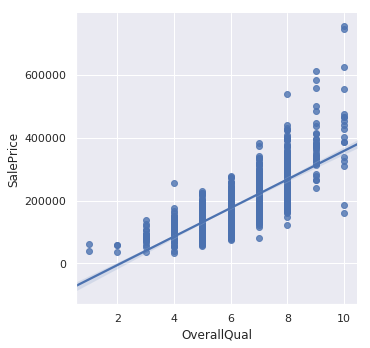

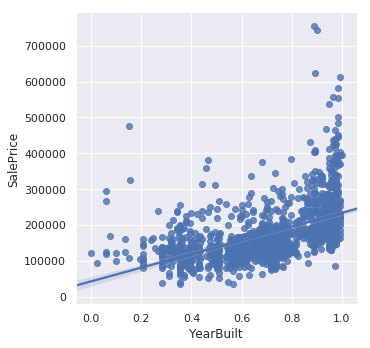

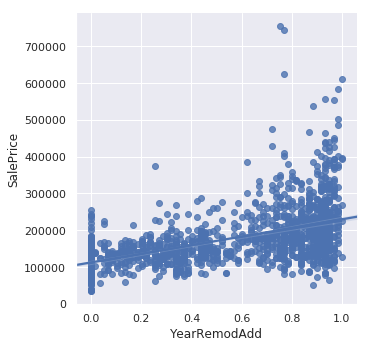

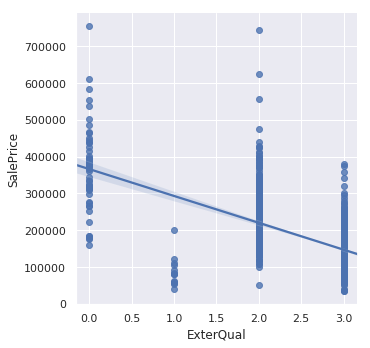

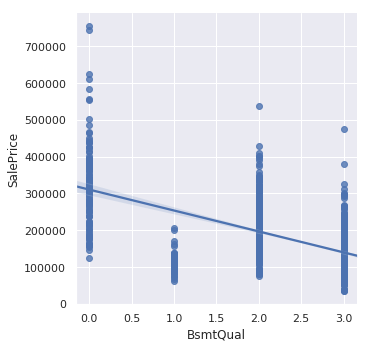

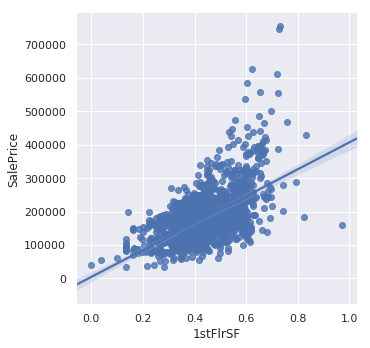

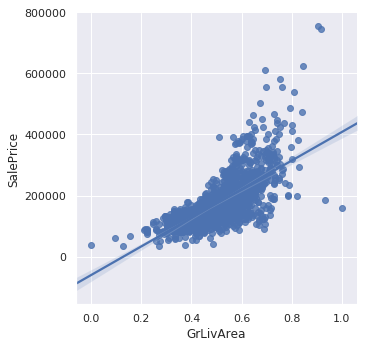

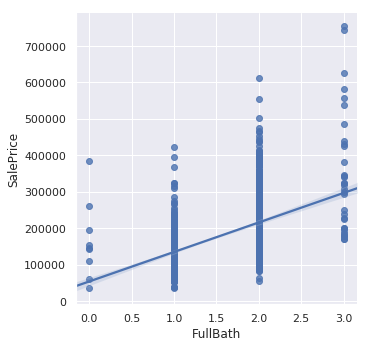

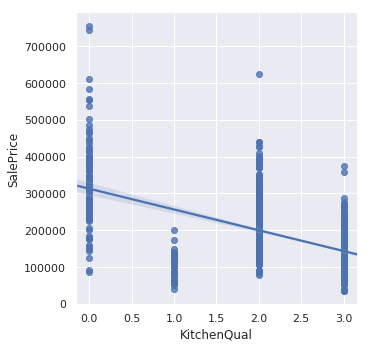

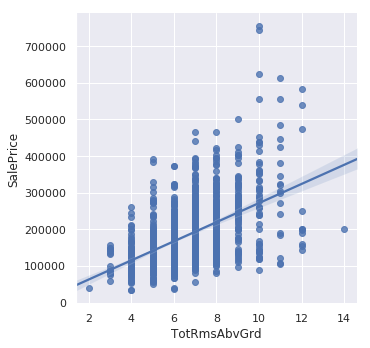

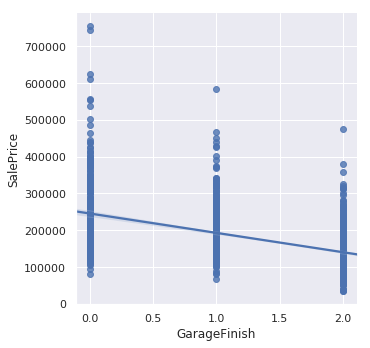

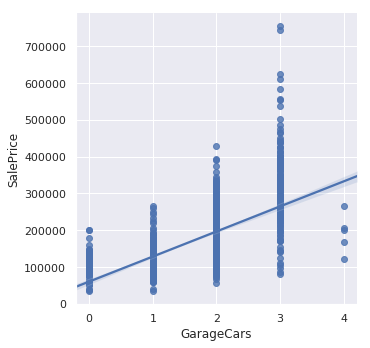

In [25]:
for j in range(len(highcorr)-1):
    colname = highcorr[j]
    sns.pairplot(x_train,x_vars=colname, y_vars=['SalePrice'], height=5, kind="reg")  #type your code here   

In [26]:
for i in range(x_train.index.max()):
    if any([
        x_train.loc[i,'YearBuilt'] < 0.2,
        x_train.loc[i,'1stFlrSF'] < 0.2 or x_train.loc[i,'1stFlrSF'] > 0.7,
        x_train.loc[i,'GrLivArea'] < 0.2 or x_train.loc[i,'GrLivArea'] > 0.8,
        ]):
        
        x_train.drop([i],inplace=True)
        train.drop([i],inplace=True)        


>剔除離群值後，再次比對散佈圖

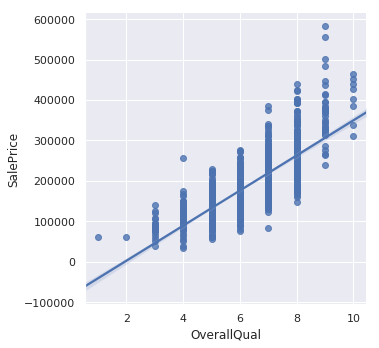

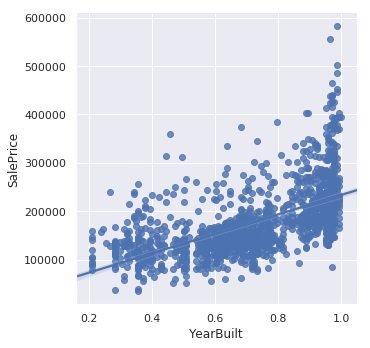

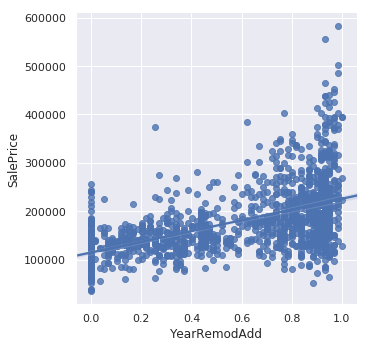

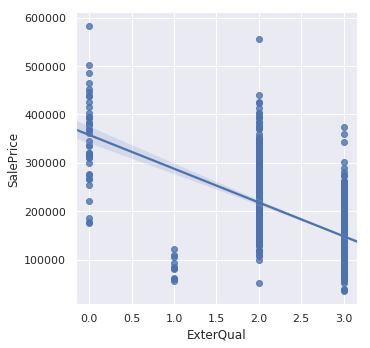

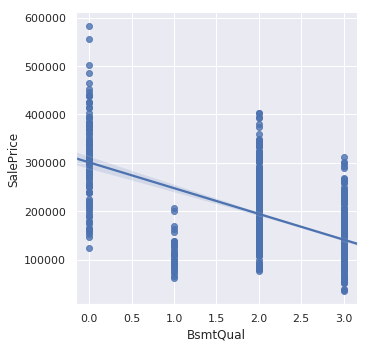

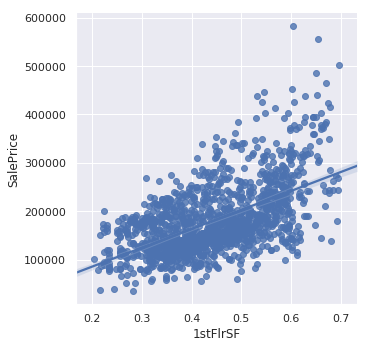

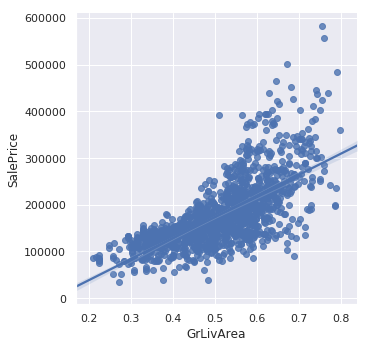

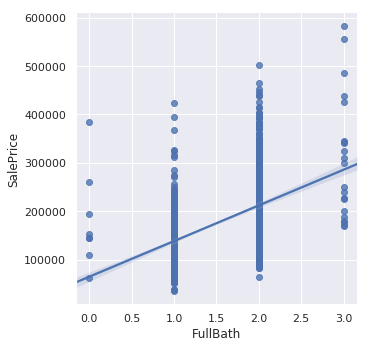

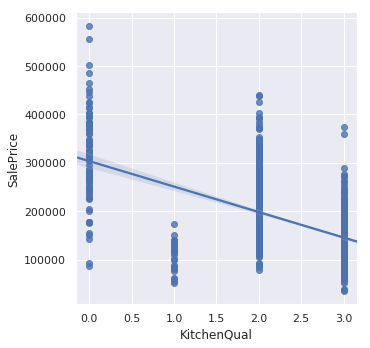

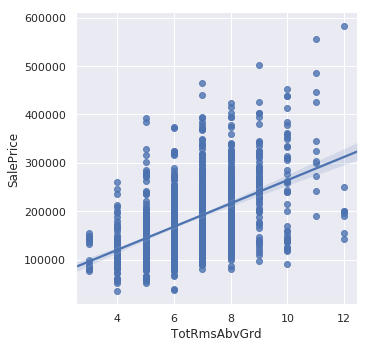

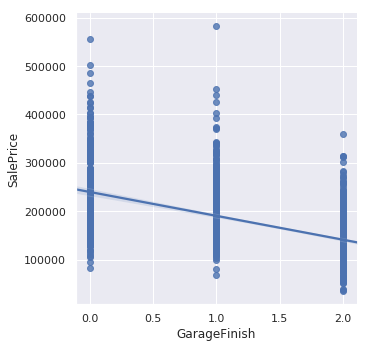

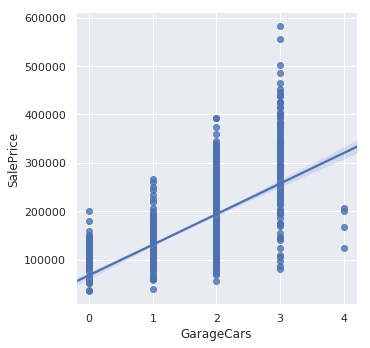

In [27]:
for j in range(len(highcorr)-1):
    colname = highcorr[j]
    sns.pairplot(x_train,x_vars=colname, y_vars=['SalePrice'], height=5, kind="reg")  #type your code here  

>標準化後的**SalePrice**移出來成為**Y_label**

In [28]:
Y_label = train.SalePrice
x_train.drop(columns=['SalePrice'], inplace=True)
x_test.drop(columns=['SalePrice'], inplace=True)

# 10. 模型訓練
- 匯入多種迴歸模型加以比對

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

X_train,X_vali,Y_train,Y_vali = train_test_split(x_train.values,Y_label.values,test_size = 0.3,random_state= 17)
X_train.shape,X_vali.shape,Y_train.shape,Y_vali.shape

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


((977, 69), (420, 69), (977,), (420,))

# 11. 參數最佳化: **GridSearchCV**
- 直接以XGBRegressor當作最終模型使用
    1. estimator: 選定的訓練模型。
>`model = XGBRegressor(**other_params)`
    2. param_grid: 最佳化的可調參數。
>`cv_params = {}`
    3. scoring: 準確度的評價標準。
>`scoring='neg_mean_squared_error'`

>Step1: **n_estimators**(最佳迭代次數)大範圍。
>`cv_params = {'n_estimators': [300, 400, 500, 600, 700]}`

In [30]:
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
cv_params = {'n_estimators': [300, 400, 500, 600, 700]}

other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1,
                'eval_metric': 'rmse', 'tree_method': 'exact'}

model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.grid_scores_
print('每輪迭代结果: {0}'.format(evalute_result))
print('參數最佳取值： {0}'.format(optimized_GBM.best_params_))
print('最佳模型得分: {0}'.format(optimized_GBM.best_score_))

n_est = optimized_GBM.best_params_['n_estimators']

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    9.6s finished


每輪迭代结果: [mean: -0.01648, std: 0.00513, params: {'n_estimators': 300}, mean: -0.01651, std: 0.00512, params: {'n_estimators': 400}, mean: -0.01654, std: 0.00510, params: {'n_estimators': 500}, mean: -0.01654, std: 0.00511, params: {'n_estimators': 600}, mean: -0.01655, std: 0.00511, params: {'n_estimators': 700}]
參數最佳取值： {'n_estimators': 300}
最佳模型得分: -0.01648269614085479


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


>Step2: **n_estimators**縮小範圍。
>`cv_params = {'n_estimators': [n_est-50, n_est-25, n_est, n_est+25, n_est+50]}`

In [31]:
# Set the parameters by cross-validation
cv_params = {'n_estimators': [n_est-50, n_est-25, n_est, n_est+25, n_est+50]}

other_params = {'learning_rate': 0.1, 'n_estimators': n_est, 'max_depth': 3, 'min_child_weight': 3, 'seed': 0,
                'subsample': 0.7, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.1,
                'eval_metric': 'rmse', 'tree_method': 'exact'}

model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.grid_scores_
print('每輪迭代结果: {0}'.format(evalute_result))
print('參數最佳取值： {0}'.format(optimized_GBM.best_params_))
print('最佳模型得分: {0}'.format(optimized_GBM.best_score_))

n_est = optimized_GBM.best_params_['n_estimators']

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.8s finished


每輪迭代结果: [mean: -0.01488, std: 0.00449, params: {'n_estimators': 250}, mean: -0.01488, std: 0.00443, params: {'n_estimators': 275}, mean: -0.01494, std: 0.00446, params: {'n_estimators': 300}, mean: -0.01504, std: 0.00445, params: {'n_estimators': 325}, mean: -0.01504, std: 0.00444, params: {'n_estimators': 350}]
參數最佳取值： {'n_estimators': 250}
最佳模型得分: -0.014876548661792714


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


>Step3: **max_depth**(控制過擬合), **min_child_weight**(調大參數可以控制過擬合)
>>`cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}`

In [32]:
# Set the parameters by cross-validation
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}

other_params = {'learning_rate': 0.1, 'n_estimators': n_est, 'max_depth': 3, 'min_child_weight': 3, 'seed': 0,
                'subsample': 0.7, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.1,
                'eval_metric': 'rmse', 'tree_method': 'exact'}

model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.grid_scores_
print('每輪迭代结果: {0}'.format(evalute_result))
print('參數最佳取值： {0}'.format(optimized_GBM.best_params_))
print('最佳模型得分: {0}'.format(optimized_GBM.best_score_))

depth = optimized_GBM.best_params_['max_depth']
weight = optimized_GBM.best_params_['min_child_weight']

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   33.3s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   45.9s finished


每輪迭代结果: [mean: -0.01536, std: 0.00466, params: {'max_depth': 3, 'min_child_weight': 1}, mean: -0.01545, std: 0.00444, params: {'max_depth': 3, 'min_child_weight': 2}, mean: -0.01488, std: 0.00449, params: {'max_depth': 3, 'min_child_weight': 3}, mean: -0.01502, std: 0.00454, params: {'max_depth': 3, 'min_child_weight': 4}, mean: -0.01530, std: 0.00473, params: {'max_depth': 3, 'min_child_weight': 5}, mean: -0.01548, std: 0.00461, params: {'max_depth': 3, 'min_child_weight': 6}, mean: -0.01574, std: 0.00453, params: {'max_depth': 4, 'min_child_weight': 1}, mean: -0.01602, std: 0.00484, params: {'max_depth': 4, 'min_child_weight': 2}, mean: -0.01529, std: 0.00454, params: {'max_depth': 4, 'min_child_weight': 3}, mean: -0.01572, std: 0.00466, params: {'max_depth': 4, 'min_child_weight': 4}, mean: -0.01554, std: 0.00474, params: {'max_depth': 4, 'min_child_weight': 5}, mean: -0.01571, std: 0.00472, params: {'max_depth': 4, 'min_child_weight': 6}, mean: -0.01595, std: 0.00502, params: {'max

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


>Step4: **gamma**(Loss Function > gamma，進行節點劃分)
>>`cv_params = {'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}`

In [33]:
# Set the parameters by cross-validation
cv_params = {'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}

other_params = {'learning_rate': 0.1, 'n_estimators': n_est, 'max_depth': depth, 'min_child_weight': weight, 'seed': 0,
                'subsample': 0.7, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.1,
                'eval_metric': 'rmse', 'tree_method': 'exact'}

model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.grid_scores_
print('每輪迭代结果: {0}'.format(evalute_result))
print('參數最佳取值： {0}'.format(optimized_GBM.best_params_))
print('最佳模型得分: {0}'.format(optimized_GBM.best_score_))

gamma = optimized_GBM.best_params_['gamma']

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    3.3s finished


每輪迭代结果: [mean: -0.01488, std: 0.00449, params: {'gamma': 0.0}, mean: -0.01611, std: 0.00520, params: {'gamma': 0.1}, mean: -0.01767, std: 0.00583, params: {'gamma': 0.2}, mean: -0.01918, std: 0.00680, params: {'gamma': 0.3}, mean: -0.01983, std: 0.00710, params: {'gamma': 0.4}, mean: -0.02126, std: 0.00769, params: {'gamma': 0.5}, mean: -0.02195, std: 0.00760, params: {'gamma': 0.6}]
參數最佳取值： {'gamma': 0.0}
最佳模型得分: -0.014876548661792714


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


>Step5: **subsample**(隨機抽取的樣本數占總樣本的比例，防止過擬合), **colsample_bytree**(對特徵隨機採樣的比例)
>>`cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}`

In [34]:
# Set the parameters by cross-validation
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}

other_params = {'learning_rate': 0.1, 'n_estimators': n_est, 'max_depth': depth, 'min_child_weight': weight, 'seed': 0,
                'subsample': 0.7, 'colsample_bytree': 0.6, 'gamma': gamma, 'reg_alpha': 0.1, 'reg_lambda': 0.1,
                'eval_metric': 'rmse', 'tree_method': 'exact'}

model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.grid_scores_
print('每輪迭代结果: {0}'.format(evalute_result))
print('參數最佳取值： {0}'.format(optimized_GBM.best_params_))
print('最佳模型得分: {0}'.format(optimized_GBM.best_score_))

subs = optimized_GBM.best_params_['subsample']
bytree = optimized_GBM.best_params_['colsample_bytree']

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    8.9s finished


每輪迭代结果: [mean: -0.01597, std: 0.00495, params: {'colsample_bytree': 0.6, 'subsample': 0.6}, mean: -0.01488, std: 0.00449, params: {'colsample_bytree': 0.6, 'subsample': 0.7}, mean: -0.01545, std: 0.00463, params: {'colsample_bytree': 0.6, 'subsample': 0.8}, mean: -0.01553, std: 0.00556, params: {'colsample_bytree': 0.6, 'subsample': 0.9}, mean: -0.01565, std: 0.00449, params: {'colsample_bytree': 0.7, 'subsample': 0.6}, mean: -0.01583, std: 0.00507, params: {'colsample_bytree': 0.7, 'subsample': 0.7}, mean: -0.01565, std: 0.00460, params: {'colsample_bytree': 0.7, 'subsample': 0.8}, mean: -0.01580, std: 0.00500, params: {'colsample_bytree': 0.7, 'subsample': 0.9}, mean: -0.01567, std: 0.00443, params: {'colsample_bytree': 0.8, 'subsample': 0.6}, mean: -0.01577, std: 0.00439, params: {'colsample_bytree': 0.8, 'subsample': 0.7}, mean: -0.01588, std: 0.00494, params: {'colsample_bytree': 0.8, 'subsample': 0.8}, mean: -0.01632, std: 0.00526, params: {'colsample_bytree': 0.8, 'subsample': 0

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


>Step6: **reg_alpha**(L1正則化的懲罰係數，維度極高可以提升運算速度), **reg_lambda**(L2正則化的懲罰係數，降低過擬合)
>>`cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}`

In [35]:
# Set the parameters by cross-validation
cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}

other_params = {'learning_rate': 0.1, 'n_estimators': n_est, 'max_depth': depth, 'min_child_weight': weight, 'seed': 0,
                'subsample': subs, 'colsample_bytree': bytree, 'gamma': gamma, 'reg_alpha': 0.1, 'reg_lambda': 0.1,
                'eval_metric': 'rmse', 'tree_method': 'exact'}

model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.grid_scores_
print('每輪迭代结果: {0}'.format(evalute_result))
print('參數最佳取值： {0}'.format(optimized_GBM.best_params_))
print('最佳模型得分: {0}'.format(optimized_GBM.best_score_))

alpha = optimized_GBM.best_params_['reg_alpha']
lamb = optimized_GBM.best_params_['reg_lambda']

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:   11.3s finished


每輪迭代结果: [mean: -0.01590, std: 0.00477, params: {'reg_alpha': 0.05, 'reg_lambda': 0.05}, mean: -0.01550, std: 0.00370, params: {'reg_alpha': 0.05, 'reg_lambda': 0.1}, mean: -0.01553, std: 0.00411, params: {'reg_alpha': 0.05, 'reg_lambda': 1}, mean: -0.01536, std: 0.00439, params: {'reg_alpha': 0.05, 'reg_lambda': 2}, mean: -0.01618, std: 0.00435, params: {'reg_alpha': 0.05, 'reg_lambda': 3}, mean: -0.01586, std: 0.00458, params: {'reg_alpha': 0.1, 'reg_lambda': 0.05}, mean: -0.01488, std: 0.00449, params: {'reg_alpha': 0.1, 'reg_lambda': 0.1}, mean: -0.01531, std: 0.00414, params: {'reg_alpha': 0.1, 'reg_lambda': 1}, mean: -0.01528, std: 0.00433, params: {'reg_alpha': 0.1, 'reg_lambda': 2}, mean: -0.01616, std: 0.00477, params: {'reg_alpha': 0.1, 'reg_lambda': 3}, mean: -0.01502, std: 0.00419, params: {'reg_alpha': 1, 'reg_lambda': 0.05}, mean: -0.01517, std: 0.00432, params: {'reg_alpha': 1, 'reg_lambda': 0.1}, mean: -0.01578, std: 0.00452, params: {'reg_alpha': 1, 'reg_lambda': 1}, me

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


>Step7: **learning_rate**
>`cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}`

In [36]:
# Set the parameters by cross-validation
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]} 

other_params = {'learning_rate': 0.1, 'n_estimators': n_est, 'max_depth': depth, 'min_child_weight': weight, 'seed': 0,
                'subsample': subs, 'colsample_bytree': bytree, 'gamma': gamma, 'reg_alpha': alpha, 'reg_lambda': lamb,
                'eval_metric': 'rmse', 'tree_method': 'exact'}

model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.grid_scores_
print('每輪迭代结果: {0}'.format(evalute_result))
print('參數最佳取值： {0}'.format(optimized_GBM.best_params_))
print('最佳模型得分: {0}'.format(optimized_GBM.best_score_))

learning = optimized_GBM.best_params_['learning_rate']

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.3s finished


每輪迭代结果: [mean: -0.90489, std: 0.01506, params: {'learning_rate': 0.01}, mean: -0.01511, std: 0.00483, params: {'learning_rate': 0.05}, mean: -0.01518, std: 0.00475, params: {'learning_rate': 0.07}, mean: -0.01488, std: 0.00449, params: {'learning_rate': 0.1}, mean: -0.01689, std: 0.00436, params: {'learning_rate': 0.2}]
參數最佳取值： {'learning_rate': 0.1}
最佳模型得分: -0.014876548661792714


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


>Step8: **seed**(隨機產生重複結果)
>`cv_params = {'seed': [0, 25, 50, 75, 100, 125, 150]}`

In [37]:
# Set the parameters by cross-validation
cv_params = {'seed': [0, 25, 50, 75, 100, 125, 150]}

other_params = {'learning_rate': learning, 'n_estimators': n_est, 'max_depth': depth, 'min_child_weight': weight, 'seed': 0,
                'subsample': subs, 'colsample_bytree': bytree, 'gamma': gamma, 'reg_alpha': alpha, 'reg_lambda': lamb,
                'eval_metric': 'rmse', 'tree_method': 'exact'}

model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.grid_scores_
print('每輪迭代结果: {0}'.format(evalute_result))
print('參數最佳取值： {0}'.format(optimized_GBM.best_params_))
print('最佳模型得分: {0}'.format(optimized_GBM.best_score_))

seed = optimized_GBM.best_params_['seed']

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    3.4s finished


每輪迭代结果: [mean: -0.01488, std: 0.00449, params: {'seed': 0}, mean: -0.01597, std: 0.00536, params: {'seed': 25}, mean: -0.01567, std: 0.00488, params: {'seed': 50}, mean: -0.01596, std: 0.00436, params: {'seed': 75}, mean: -0.01628, std: 0.00454, params: {'seed': 100}, mean: -0.01541, std: 0.00488, params: {'seed': 125}, mean: -0.01524, std: 0.00392, params: {'seed': 150}]
參數最佳取值： {'seed': 0}
最佳模型得分: -0.014876548661792714


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


>Step9: 存取**XGBRegressor**最佳化參數
>`other_params = {'learning_rate': learning, 'n_estimators': n_est, 'max_depth': depth, 'min_child_weight': weight, 'seed': seed,
                'subsample': subs, 'colsample_bytree': bytree, 'gamma': gamma, 'reg_alpha': alpha, 'reg_lambda': lamb,
                'eval_metric': 'rmse', 'tree_method': 'exact'}`

In [38]:
other_params = {'learning_rate': learning, 'n_estimators': n_est, 'max_depth': depth, 'min_child_weight': weight, 'seed': seed,
                'subsample': subs, 'colsample_bytree': bytree, 'gamma': gamma, 'reg_alpha': alpha, 'reg_lambda': lamb,
                'eval_metric': 'rmse', 'tree_method': 'exact'}

>訓練多個模型

In [39]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)
rdgCV.fit(X_train,Y_train)

rdg = Ridge(alpha=10)
rdg.fit(X_train, Y_train)

rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rfr.fit(X_train,Y_train)

abr = AdaBoostRegressor(n_estimators=100,learning_rate=1.,loss='linear')
abr.fit(X_train,Y_train)

gbr = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                 subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                 min_samples_leaf=1, min_weight_fraction_leaf=0.,
                 max_depth=3, min_impurity_decrease=0.,
                 min_impurity_split=None, init=None, random_state=None,
                 max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None,
                 warm_start=False, presort='auto')
gbr.fit(X_train,Y_train)

br = BaggingRegressor(n_jobs=-1, n_estimators=100)
br.fit(X_train,Y_train)

etr = ExtraTreeRegressor()
etr.fit(X_train,Y_train)

# xgboost
xgb = XGBRegressor(**other_params)
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, eval_metric='rmse', gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=250, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.1,
       reg_lambda=0.1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.7, tree_method='exact')

>額外使用**StackingCVRegressor**组合多个迴歸模型

In [40]:
from mlxtend.regressor import StackingCVRegressor

stack = StackingCVRegressor(regressors=(lm , br, gbr), meta_regressor=xgb)
stack.fit(X_train,Y_train)

StackingCVRegressor(cv=5,
          meta_regressor=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, eval_metric='rmse', gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=250, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.1,
       reg_lambda=0.1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.7, tree_method='exact'),
          refit=True,
          regressors=(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
         ver...rs=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)),
          shuffle=True, store_train_meta_features=False,
          use_fea

In [41]:
print('-- training score --')
print('LinearRegression:', lm.score(X_train, Y_train))
print('LinearRegression rdg:', rdg.score(X_train, Y_train))
print('LinearRegression rdgCV:', rdgCV.score(X_train, Y_train))
print('RandomForestRegressor rfr:', rfr.score(X_train, Y_train))
print('AdaBoostRegressor abr:', abr.score(X_train, Y_train))
print('GradientBoostingRegressor gbr:', gbr.score(X_train, Y_train))
print('BaggingRegressor br:', br.score(X_train, Y_train))
print('ExtraTreeRegressor etr:', etr.score(X_train, Y_train))
print('XGBRegressor xgb:', xgb.score(X_train, Y_train))
print('StackingCVRegressor stack:', stack.score(X_train, Y_train))


print()

print('-- Validation score --')
print('LinearRegression:', lm.score(X_vali, Y_vali))
print('LinearRegression rdg:', rdg.score(X_vali, Y_vali))
print('LinearRegression rdgCV:', rdgCV.score(X_vali, Y_vali))
print('RandomForestRegressor rfr:', rfr.score(X_vali, Y_vali))
print('AdaBoostRegressor abr:', abr.score(X_vali, Y_vali))
print('GradientBoostingRegressor gbr:', gbr.score(X_vali, Y_vali))
print('BaggingRegressor br:', br.score(X_vali, Y_vali))
print('ExtraTreeRegressor etr:', etr.score(X_vali, Y_vali))
print('XGBRegressor xgb:', xgb.score(X_vali, Y_vali))
print('StackingCVRegressor stack:', stack.score(X_vali, Y_vali))

-- training score --
LinearRegression: 0.9113412638774875
LinearRegression rdg: 0.8917828909594846
LinearRegression rdgCV: 0.9112136760061716
RandomForestRegressor rfr: 0.9811505789564849
AdaBoostRegressor abr: 0.8545613759417002
GradientBoostingRegressor gbr: 0.9611805388268854
BaggingRegressor br: 0.9813452783279727
ExtraTreeRegressor etr: 0.9999999999743324
XGBRegressor xgb: 0.9774761073156287
StackingCVRegressor stack: 0.9499011050452322

-- Validation score --
LinearRegression: 0.8991709032721985
LinearRegression rdg: 0.8870791509953528
LinearRegression rdgCV: 0.8995214743822145
RandomForestRegressor rfr: 0.8836405631730939
AdaBoostRegressor abr: 0.812333941951511
GradientBoostingRegressor gbr: 0.9021589572779181
BaggingRegressor br: 0.8826122227550435
ExtraTreeRegressor etr: 0.7224096208335007
XGBRegressor xgb: 0.9119957771098672
StackingCVRegressor stack: 0.8935619590979396


## Summary
我們總結一下目前為止的步驟
> **缺失值**
  - 在一開始資料探索，我們檢查了所有資料的缺失值 NaN。
  
  
  - 檢查所有欄位評級，在評價上有優劣關係的欄位，使用LabelEncoder轉成數值型態。
  - 針對連續型態及離散型態的欄位畫圖，去除離群值。
  
  - 為了符合迴歸基本線性關係假設，我們針對偏態係數連續變數的欄位以及SalePrice進行對數轉換。
  - 接下來，我們使用對數轉換過的預測值SalePrice訓練得到模型之後，最後在testing data上得到的最終預測值需要使用自然指數 e 轉換回去

# 12. 選定模型及預測

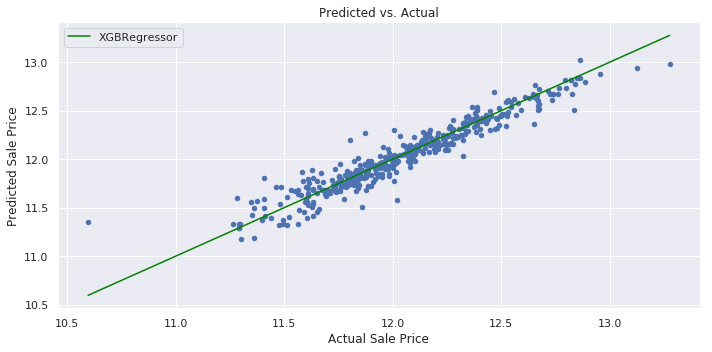

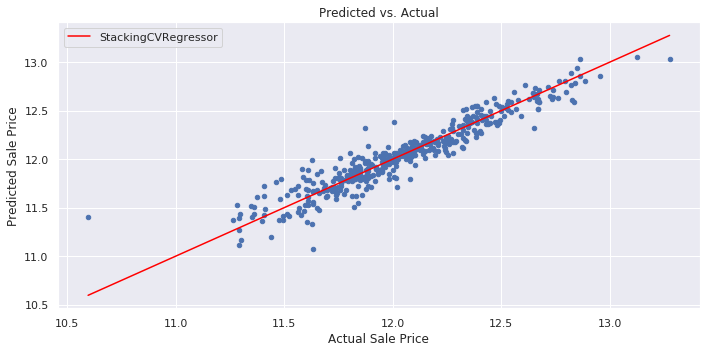

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

# Model 1
y_pred = xgb.predict(X_vali)
plt.figure(figsize=(10, 5))
plt.scatter(Y_vali, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot([min(Y_vali), max(Y_vali)], [min(Y_vali), max(Y_vali)], color='green',label='XGBRegressor')
plt.legend(loc='upper left')
plt.tight_layout()

# Model 2
y_pred = stack.predict(X_vali)
plt.figure(figsize=(10, 5))
plt.scatter(Y_vali, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot([min(Y_vali), max(Y_vali)], [min(Y_vali), max(Y_vali)], color='red',label='StackingCVRegressor')
plt.legend(loc='upper left')
plt.tight_layout()


In [43]:
label1 = np.expm1(xgb.predict(x_test.values))
label2 = np.expm1(stack.predict(x_test.values))

Final_labels = label1*0.7 + label2*0.3
pd.DataFrame({'Id': test.Id, 'SalePrice': Final_labels}).to_csv('2019-2-22.csv', index=False)